2D plotting utilities
===============


**Suhas Somnath**

8/12/2017  

**This is a short walk-through of useful plotting utilities available in sidpy**


Introduction
--------------
Some of the functions in ``sidpy.viz.plot_utils`` fill gaps in the default matplotlib package, some were
developed for scientific applications, These functions have been developed
to substantially simplify the generation of high quality figures for journal publications.

### Table of contents:
* [plot_map](#plot_map)
* [plot_map_stack](#plot_map_stack)
* [plot_complex_spectra](#plot_complex_spectra)


#### Import necessary packages:

In [16]:
from __future__ import division, print_function, absolute_import, unicode_literals
import numpy as np
from warnings import warn
import matplotlib.pyplot as plt
import subprocess
import sys


def install(package):
    subprocess.call([sys.executable, "-m", "pip", "install", package])
# Package for downloading online files:
try:
    import sidpy
except ImportError:
    warn('sidpy not found.  Will install with pip.')
    import pip
    install('sidpy')
    import sidpy

# plot_map()

This function adds several popularly used features to the basic image plotting function in matplotlib including:

* easy addition of a colorbar
* custom x and y tick values
* clipping the colorbar to N standard deviations of the mean


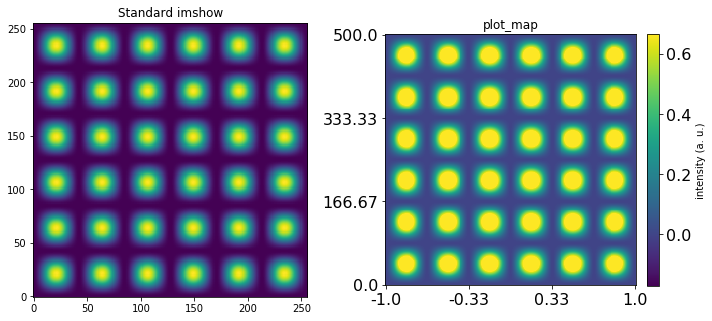

In [17]:
x_vec = np.linspace(0, 6*np.pi, 256)
y_vec = np.sin(x_vec)**2

atom_intensities = y_vec * np.atleast_2d(y_vec).T

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))

# Standard imshow plot for reference
axes[0].imshow(atom_intensities, origin='lower')
axes[0].set_title('Standard imshow')


# Now plot_map with some options enabled:
sidpy.viz.plot_utils.plot_map(axes[1], atom_intensities, stdevs=1.5, num_ticks=4,
                       x_vec=np.linspace(-1, 1, atom_intensities.shape[0]),
                       y_vec=np.linspace(0, 500, atom_intensities.shape[1]),
                       cbar_label='intensity (a. u.)', tick_font_size=16)
axes[1].set_title('plot_map')
fig.tight_layout()

# plot_map_stack()

One of the most popular operations in scientific research is the visualization of a stack of images.  
This function is built specifically for that purpose.   
Here we simply simulate some images using sinusoidal functions for demonstration purposes.

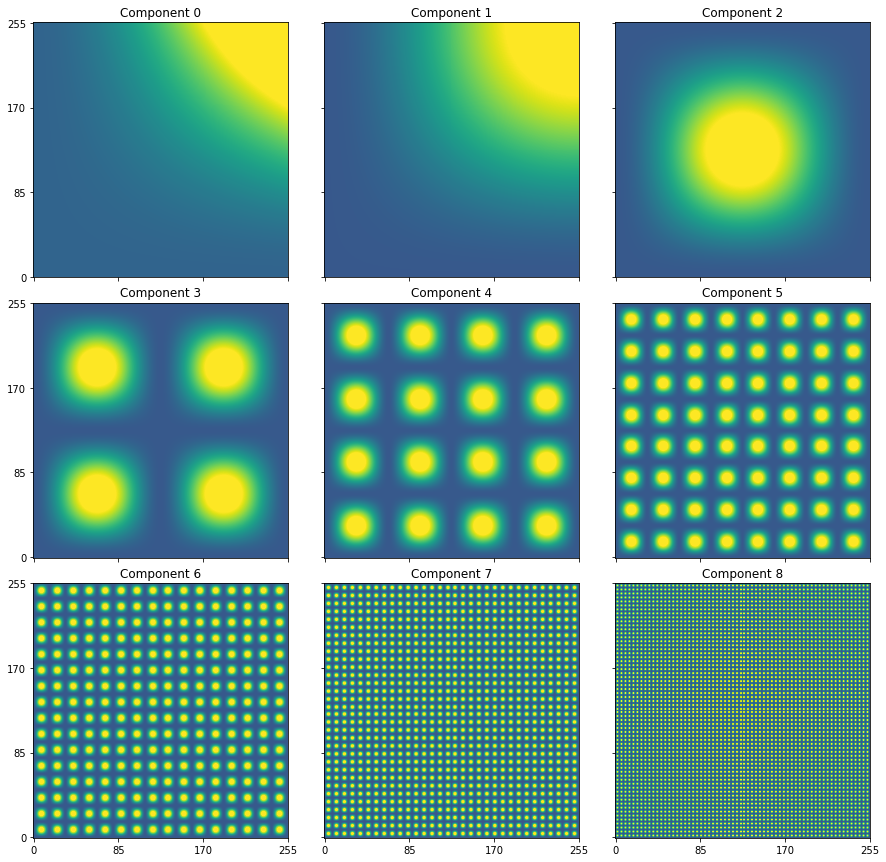

In [18]:
def get_sine_2d_image(freq):
    x_vec = np.linspace(0, freq*np.pi, 256)
    y_vec = np.sin(x_vec)**2
    return y_vec * np.atleast_2d(y_vec).T


frequencies = [0.25, 0.5, 1, 2, 4 ,8, 16, 32, 64]
image_stack = [get_sine_2d_image(freq) for freq in frequencies]
image_stack = np.array(image_stack)

fig, axes = sidpy.viz.plot_utils.plot_map_stack(image_stack, reverse_dims=False, title_yoffset=0.95)

# plot_complex_spectra()

This function plots the amplitude and phase components of a stack of complex valued 2D images.  
Here we simulate the data using sine and cosine components

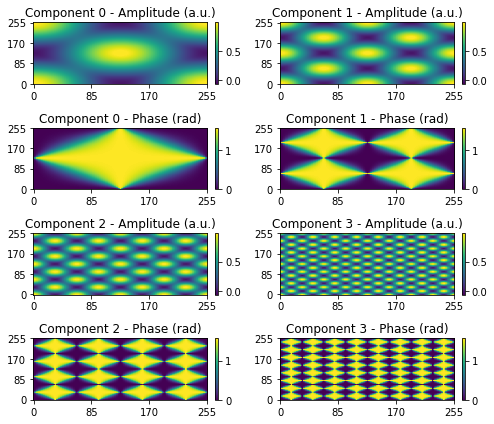

In [19]:
def get_complex_2d_image(freq):
    # Simple function to generate images
    x_vec = np.linspace(0, freq*np.pi, 256)
    y_vec_1 = np.sin(x_vec)**2
    y_vec_2 = np.cos(x_vec)**2
    return y_vec_2 * np.atleast_2d(y_vec_2).T + 1j*(y_vec_1 * np.atleast_2d(y_vec_1).T)


# The range of frequences over which the images are generated
frequencies = 2 ** np.arange(4)
image_stack = [get_complex_2d_image(freq) for freq in frequencies]

fig, axes = sidpy.viz.plot_utils.plot_complex_spectra(np.array(image_stack), figsize=(3.5, 3))